In [3]:
import numpy as np
import pyogrio
import geopandas as gpd
from tqdm import tqdm
import matplotlib.pyplot as plt

insar_data_path = "C:/Users/eleonore.kong/Documents/InSAR/DATA/grid_stats_agg_lpf.gpkg"
layer = 'grid_250m_filterd60'
output = "C:/Users/eleonore.kong/Documents/InSAR/DATA/"

In [4]:
gdf = pyogrio.read_dataframe(insar_data_path, layer=layer)

In [7]:
gdf = gdf[gdf['Type'] == 'Trough']
gdf.head()

,grid_250m,year,Type,Value_median,year_median,month_median,time_gap_median,value_diff_median,value_diff_abs_median,month_trough_median,...,gap_insar_swi_trough_median,gap_insar_swi_peak_median,NIVEAU_median,value_diff_abs_denorm_median,median_value_diff_abs_2016_2021_median,median_value_diff_abs_denorm_2016_2021_median,gap_insar_swi_trough_days_median,gap_insar_swi_peak_days_median,amp_diff_to_median_median,geometry
0,24411.0,2016,Trough,0.702830,2016.0,8.0,NaN,NaN,NaN,8.0,...,0.0,NaN,0.0,NaN,2.88,2.443618,0.0,NaN,NaN,"POLYGON ((111597.366 6840604.000, 111669.535 6..."
2,24411.0,2017,Trough,0.706032,2017.0,7.5,2.9,-0.811,0.811,6.0,...,1.5,NaN,0.0,0.688116,2.88,2.443618,40.5,NaN,-1.755502,"POLYGON ((111597.366 6840604.000, 111669.535 6..."
4,24411.0,2018,Trough,0.704809,2018.0,10.0,7.2,-4.290,4.290,9.0,...,1.0,NaN,0.0,3.639973,2.88,2.443618,2.0,NaN,1.196355,"POLYGON ((111597.366 6840604.000, 111669.535 6..."
6,24411.0,2019,Trough,0.703911,2019.0,6.0,4.0,-4.147,4.147,9.0,...,-3.0,NaN,0.0,3.518640,2.88,2.443618,-87.0,NaN,1.075022,"POLYGON ((111597.366 6840604.000, 111669.535 6..."
8,24411.0,2020,Trough,0.703636,2020.0,9.0,7.6,-4.545,4.545,9.0,...,0.0,NaN,0.0,3.856335,2.88,2.443618,0.0,NaN,1.412717,"POLYGON ((111597.366 6840604.000, 111669.535 6..."


In [23]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (You can use any dataset)
# Example using sklearn's Iris dataset

# Create a DataFrame for easy manipulation


# df = gdf[['Detrended Amplitude_median', 'mean_swi', 'winter_max_swi', 'summer_min_swi', 'winter_summer_swi_diff', 'NIVEAU']]
# df = gdf[[col for col in gdf.columns if '2018' in col]]

df = gdf.drop(['grid_250m','Type','geometry', 'year', 'year_median', 'month_median', 'NIVEAU_median'], axis=1)
df.fillna(0, inplace=True)
target = gdf['NIVEAU_median'].values

In [24]:
# Step 3: Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA
pca = PCA(n_components=6)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

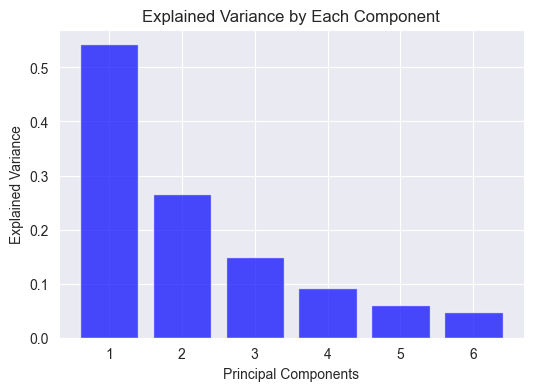

In [25]:
# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']) #, 'PC7', 'PC8', 'PC9', 'PC10'
pca_df['Target'] = target

# Step 6: Plot the Explained Variance Ratio
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='blue', alpha=0.7)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Component')
plt.show()

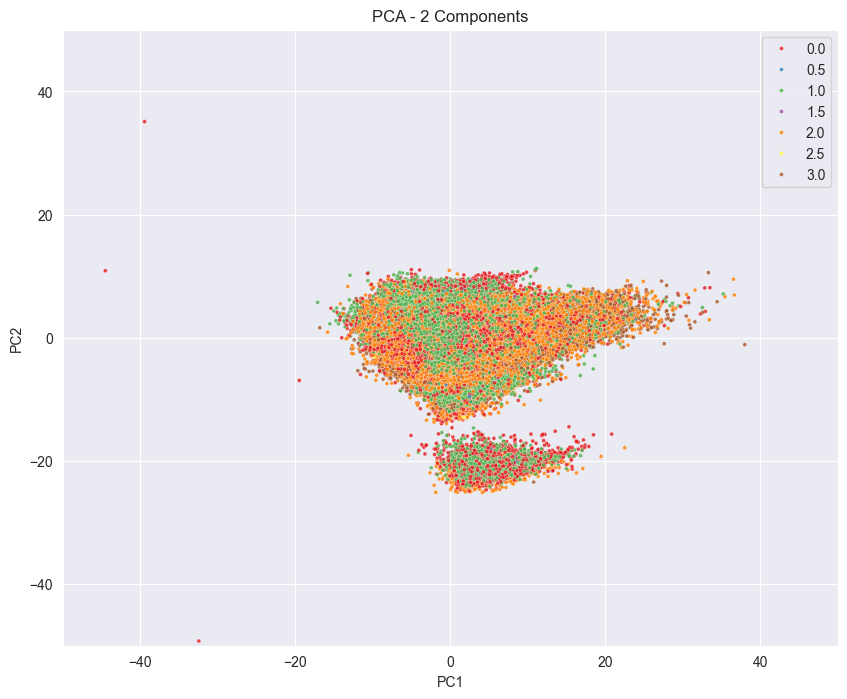

In [26]:
# Step 7: Visualize PCA Result
fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
#                 c=target, cmap='Set1', s=5, alpha=0.8)
sns.scatterplot(x='PC1', y='PC2', hue=target, palette='Set1', data=pca_df, s=8, alpha=0.8) #
# ax.view_init(elev=20, azim=40)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
plt.xlim(-50,50)
plt.ylim(-50,50)
# plt.zlim(-10,0)
plt.title('PCA - 2 Components')
# fig.colorbar(sc)
plt.show()

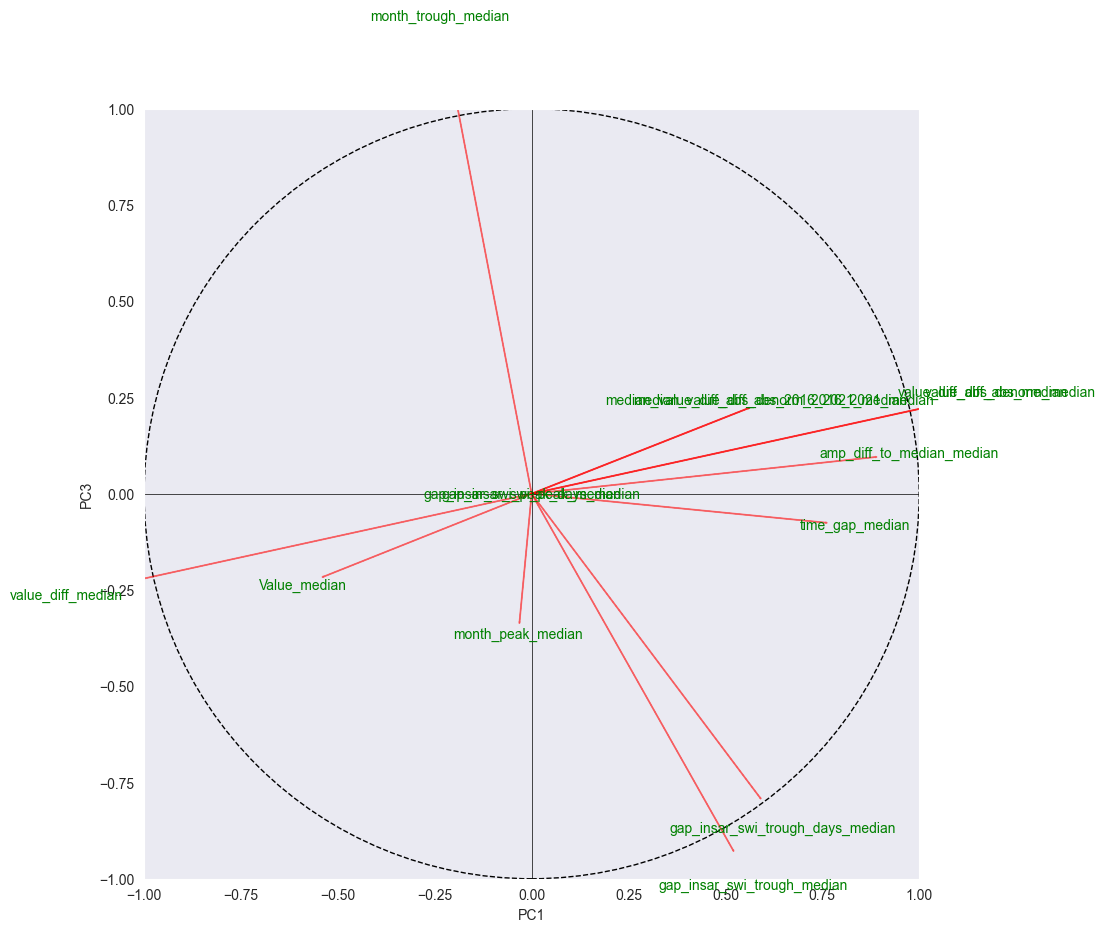

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_scaled is the standardized data, and pca is already fitted
components = pca.components_  # Get PCA components
n_pcs = pca.n_components_  # Number of principal components

# Step 1: Calculate the correlation between original variables and PCs
correlations = components.T * np.sqrt(pca.explained_variance_)

# Step 2: Plot the correlation circle
plt.figure(figsize=(10, 10))

# Plot unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Add each variable as a vector
for i, (var_name, coord) in enumerate(zip(df.columns, correlations)):
    plt.arrow(0, 0, coord[0], coord[1], color='r', alpha=0.5)
    plt.text(coord[0] * 1.1, coord[1] * 1.1, var_name,  color='g', ha='center', va='center')

# Formatting the plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('PC1')
plt.ylabel('PC3')
# plt.title('Variable Correlation Circle (PC5 vs PC6)')
plt.grid()

plt.show()


In [29]:

# Get the explained variance for scaling
explained_variance = np.sqrt(pca.explained_variance_)

# Calculate the correlation of each variable with PC1
correlations_with_pc1 = components[0, :] * explained_variance[0]
correlations_with_pc2 = components[1, :] * explained_variance[1]
correlations_with_pc3 = components[2, :] * explained_variance[2]
correlations_with_pc4 = components[3, :] * explained_variance[3]
correlations_with_pc5 = components[4, :] * explained_variance[4]
correlations_with_pc6 = components[5, :] * explained_variance[5]

# Create a DataFrame to store the variables and their correlations
correlation_df = pd.DataFrame({
    'Variable': df.columns,
    'Correlation_with_PC1': correlations_with_pc1,
    'Correlation_with_PC2': correlations_with_pc2,
    'Correlation_with_PC3': correlations_with_pc3,
    'Correlation_with_PC4': correlations_with_pc4,
    'Correlation_with_PC5': correlations_with_pc5,
    'Correlation_with_PC6': correlations_with_pc6,
    
})

# Sort the DataFrame by the absolute correlation values in descending order
correlation_df['PC1_Abs_Correlation'] = correlation_df['Correlation_with_PC1'].abs()
correlation_df['PC2_Abs_Correlation'] = correlation_df['Correlation_with_PC2'].abs()
correlation_df['PC3_Abs_Correlation'] = correlation_df['Correlation_with_PC3'].abs()
correlation_df['PC4_Abs_Correlation'] = correlation_df['Correlation_with_PC4'].abs()
correlation_df['PC5_Abs_Correlation'] = correlation_df['Correlation_with_PC5'].abs()
correlation_df['PC6_Abs_Correlation'] = correlation_df['Correlation_with_PC6'].abs()
# correlation_df_sorted = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the ranked variables by correlation with PC1
correlation_df

,Variable,Correlation_with_PC1,Correlation_with_PC2,Correlation_with_PC3,Correlation_with_PC4,Correlation_with_PC5,Correlation_with_PC6,PC1_Abs_Correlation,PC2_Abs_Correlation,PC3_Abs_Correlation,PC4_Abs_Correlation,PC5_Abs_Correlation,PC6_Abs_Correlation
0,Value_median,-0.536776,-0.215331,-0.201183,0.004754,-0.298810,6.685296e-01,0.536776,0.215331,0.201183,0.004754,0.298810,6.685296e-01
1,time_gap_median,0.758391,-0.075133,-0.441440,0.205126,-0.321254,-3.916203e-02,0.758391,0.075133,0.441440,0.205126,0.321254,3.916203e-02
2,value_diff_median,-1.091086,-0.240290,-0.032150,0.097569,-0.034434,-1.225351e-01,1.091086,0.240290,0.032150,0.097569,0.034434,1.225351e-01
3,value_diff_abs_median,1.091086,0.240290,0.032150,-0.097569,0.034434,1.225351e-01,1.091086,0.240290,0.032150,0.097569,0.034434,1.225351e-01
4,month_trough_median,-0.214919,1.127250,-0.265906,0.174234,-0.497227,-1.842322e-01,0.214919,1.127250,0.265906,0.174234,0.497227,1.842322e-01
5,month_peak_median,-0.031228,-0.332692,0.329447,-0.847180,-0.404454,-1.254452e-01,0.031228,0.332692,0.329447,0.847180,0.404454,1.254452e-01
6,gap_insar_swi_trough_median,0.519453,-0.925205,-0.033698,0.276453,-0.219418,-1.229739e-01,0.519453,0.925205,0.033698,0.276453,0.219418,1.229739e-01
7,gap_insar_swi_peak_median,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-2.632835e-18,0.000000,0.000000,0.000000,0.000000,0.000000,2.632835e-18
8,value_diff_abs_denorm_median,1.091086,0.240290,0.032150,-0.097569,0.034434,1.225351e-01,1.091086,0.240290,0.032150,0.097569,0.034434,1.225351e-01
9,median_value_diff_abs_2016_2021_median,0.558836,0.221903,0.666752,0.167967,-0.078676,6.289253e-02,0.558836,0.221903,0.666752,0.167967,0.078676,6.289253e-02


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Calculate the correlation matrix
corr_matrix = df.corr(method='pearson')



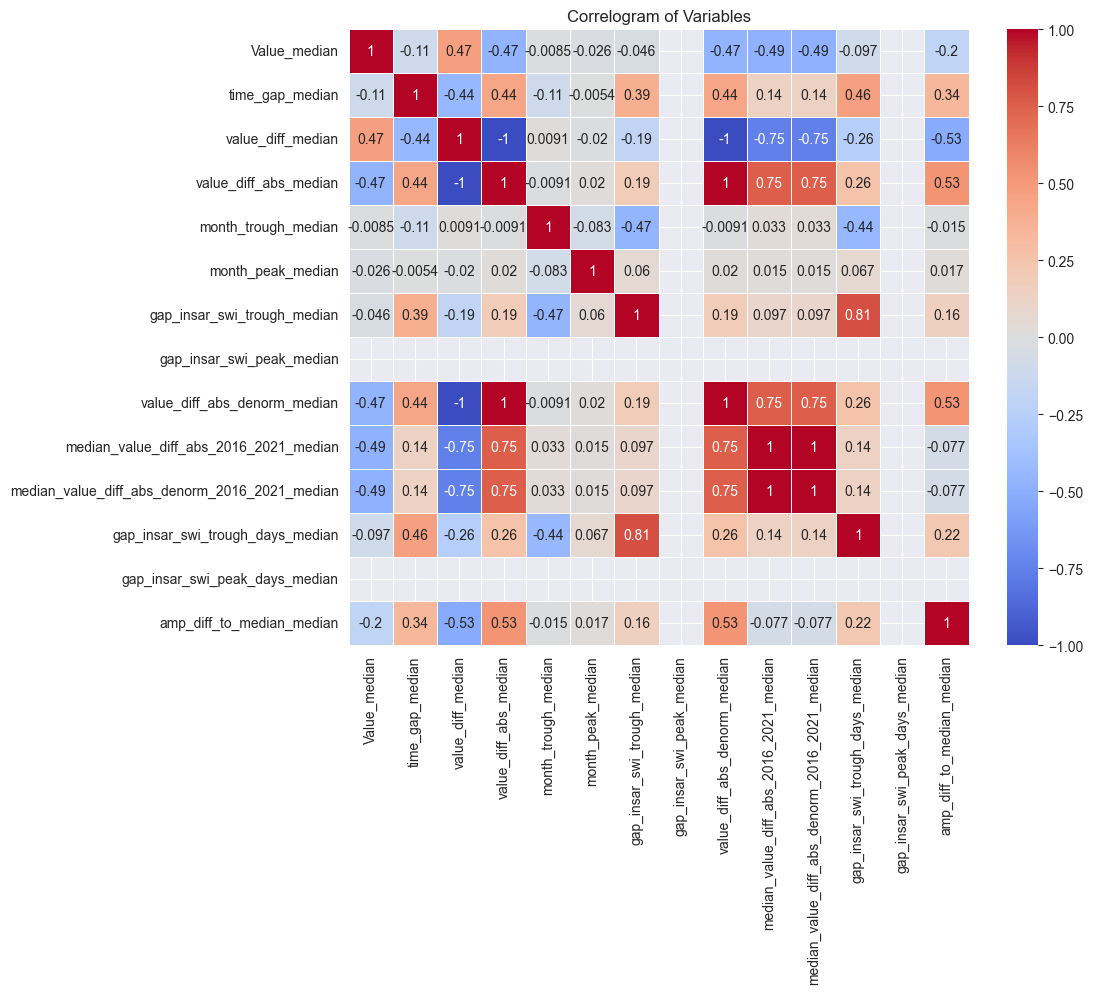

In [33]:
# Step 2: Create a correlogram (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Step 3: Add plot formatting
plt.title('Correlogram of Variables')
plt.show()